<a href="https://colab.research.google.com/github/Soumya-Eppala/Sentiment_Analysis_on_Social_Media_Data/blob/main/Sentiment_Analysis_on_Social_Media_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing Libraries
import re #cleaning the text
import pandas as pd
import numpy as np
import string
import nltk
import warnings

#Importing dataset
dataset = pd.read_csv('train.csv')
testdata = pd.read_csv('test.csv')

#combine train and test set
combi = dataset.append(testdata, ignore_index=True)

## importing regular expression library ## clean tweet text by removing links, special characters etc
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)

    return input_txt

# remove twitter handles (@user)
combi['tweet'] = np.vectorize(remove_pattern)(combi['tweet'], "@[\w]*")

# remove special characters, numbers, punctuations
combi['tweet'] = combi['tweet'].str.replace("[^a-zA-Z#]", " ")

#Removing Short Words
combi['tweet'] = combi['tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

tokenized_tweet = combi['tweet'].apply(lambda x: x.split())


from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming

#Now let’s stitch these tokens
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

combi['tweet'] = tokenized_tweet

#Bag-of-Words Features

from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(combi['tweet'])


from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

train_bow = bow[:31962,:]
test_bow = bow[31962:,:]

# splitting data into training and validation set
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, dataset['label'])

from sklearn.svm import SVC
svm = SVC()
svm = SVC(kernel = 'rbf', random_state = 0, gamma = 0.14, C =11)
svm.fit(xtrain_bow, ytrain)
y_pred5 = svm.predict(xvalid_bow)
prediction_int7 = y_pred5.astype(np.int)
f1_score(yvalid, prediction_int7)

#prediction on test set
test_pred = svm.predict(test_bow)
test_pred_int = test_pred.astype(np.int)
testdata['label'] = test_pred_int
submission = testdata[['id','label']]
submission.to_csv('svmrbfbow.csv', index=False) # writing data to a CSV file


<ipython-input-1-d3cc6365d6cd>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combi = dataset.append(testdata, ignore_index=True)
<ipython-input-1-d3cc6365d6cd>:28: FutureWarning: The default value of regex will change from True to False in a future version.
  combi['tweet'] = combi['tweet'].str.replace("[^a-zA-Z#]", " ")
<ipython-input-1-d3cc6365d6cd>:69: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  prediction_int7 = y_pred5.astype(np.int)
<ipython-input

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


<ipython-input-2-606967df26e8>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combi = dataset.append(testdata, ignore_index=True)
<ipython-input-2-606967df26e8>:57: FutureWarning: The default value of regex will change from True to False in a future version.
  combi['tweet'] = combi['tweet'].str.replace("[^a-zA-Z#]", " ")
<ipython-input-2-606967df26e8>:191: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  prediction_int1 = prediction_int1.astype(np.int)
<ipyt

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 1595, in _get_outputs
    yield from self._retrieve()
  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 1707, in _retrieve
    time.sleep(0.01)
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-2-606967df26e8>", line 309, in <cell line: 309>
    grid_search = grid_search.fit(xtrain_bow, ytrain)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py", line 874, in fit
    self._run_search(evaluate_candidates)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py", line 1388, in _run_search
    evaluate_candidates(ParameterGrid(self.param_grid))
  Fi

TypeError: ignored

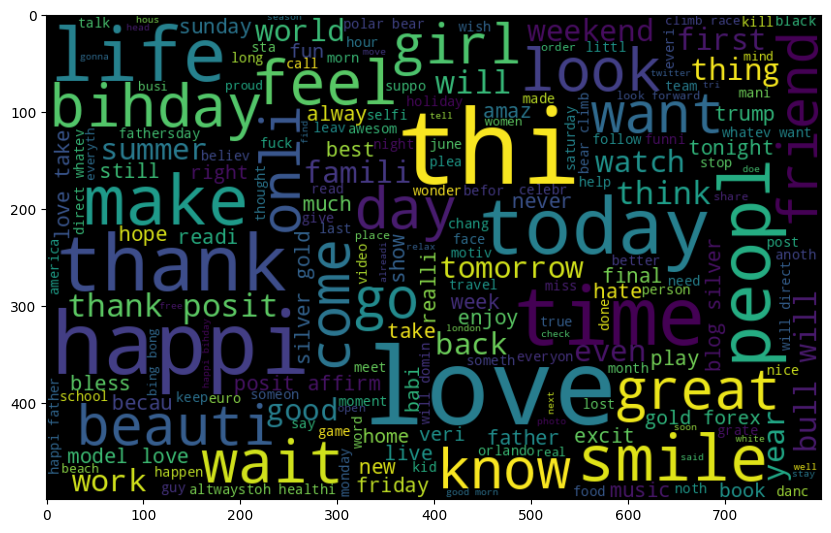

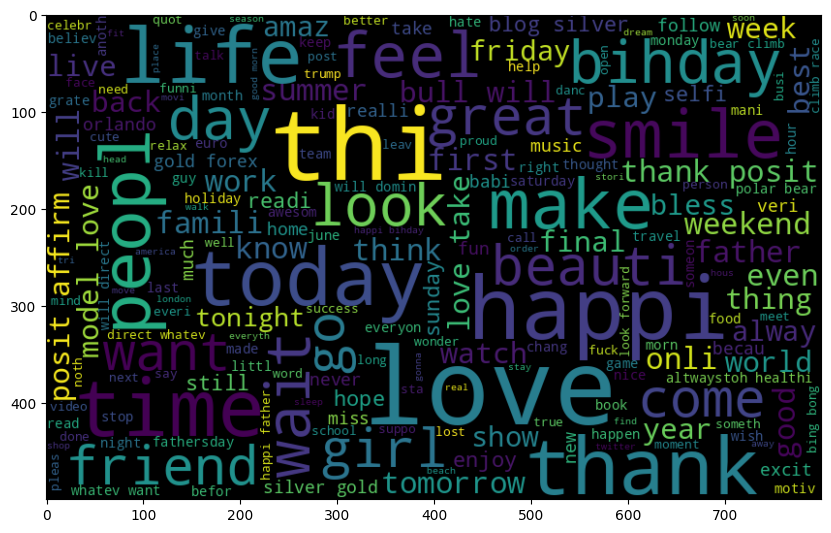

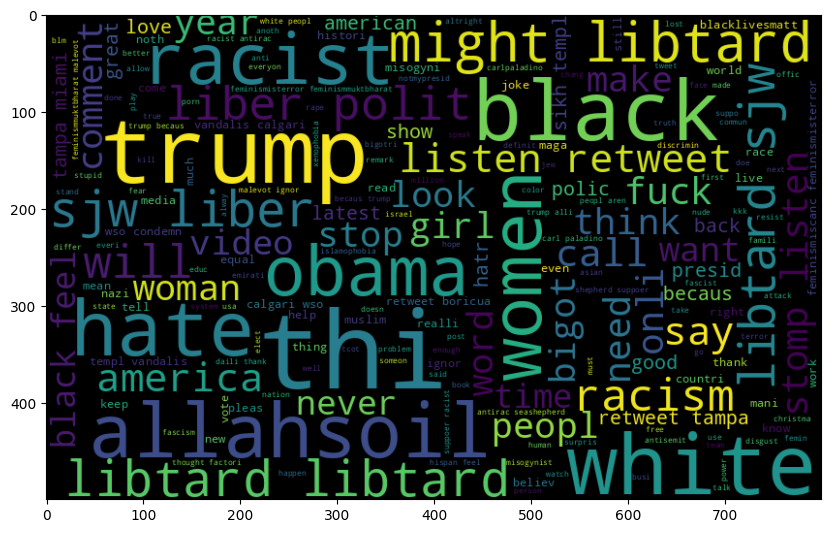

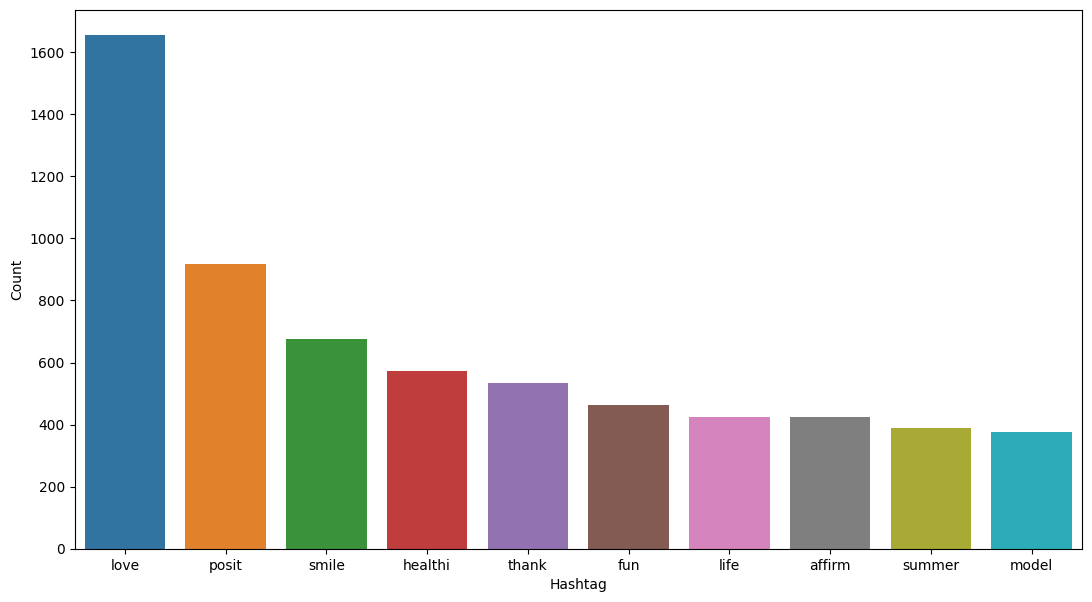

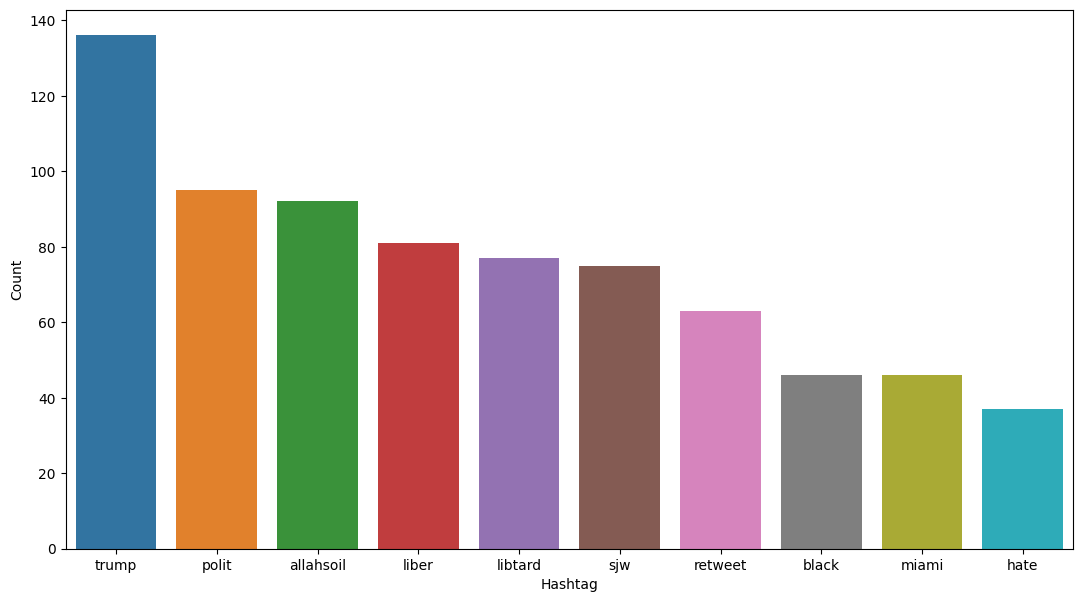

In [2]:
#Importing Libraries
import re #cleaning the text
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
import warnings

#NLTK is a leading platform for building Python programs to work with human language data

#Importing dataset
dataset = pd.read_csv('train.csv')
testdata = pd.read_csv('test.csv')

#To see the first few rows of the train dataset
dataset.head()

dataset.info()

#breakdown of how many tweets are ‘0’s and how many tweets are ‘1’s.
dataset['label'].value_counts()

#Initial data cleaning requirements that we can think of after looking at the top 5 records:
#The Twitter handles are already masked as @user due to privacy concerns. So, these Twitter handles are hardly giving any information about the nature of the tweet.
#We can also think of getting rid of the punctuations, numbers and even special characters since they wouldn’t help in differentiating different kinds of tweets.
#Most of the smaller words do not add much value. For example, ‘pdx’, ‘his’, ‘all’. So, we will try to remove them as well from our data.
#Once we have executed the above three steps, we can split every tweet into individual words or tokens which is an essential step in any NLP task.
#In the 4th tweet, there is a word ‘love’. We might also have terms like loves, loving, lovable, etc. in the rest of the data. These terms are often used in the same
#context. If we can reduce them to their root word, which is ‘love’, then we can reduce the total number of unique words in our data without losing a significant amount of information.


#Tweets Preprocessing and Cleaning
#The objective of this step is to clean noise those are less relevant to find the sentiment of tweets such as punctuation,
#special characters, numbers, and terms which don’t carry much weightage in context to the text.

#a user-defined function to remove unwanted text patterns from the tweets.
# The function returns the same input string but without the given pattern

#combine train and test set
combi = dataset.append(testdata, ignore_index=True)


## importing regular expression library ## clean tweet text by removing links, special characters etc
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)

    return input_txt

# remove twitter handles (@user)
combi['tweet'] = np.vectorize(remove_pattern)(combi['tweet'], "@[\w]*")

# remove special characters, numbers, punctuations
combi['tweet'] = combi['tweet'].str.replace("[^a-zA-Z#]", " ")


#Removing Short Words
combi['tweet'] = combi['tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

#Tokenization is the act of breaking up a sequence of strings into pieces such as words, keywords, phrases, symbols and other elements called tokens.
#Tokens can be individual words, phrases or even whole sentences. In the process of tokenization, some characters like punctuation marks are discarded
tokenized_tweet = combi['tweet'].apply(lambda x: x.split())

#Stemming is a rule-based process of stripping the suffixes (“ing”, “ly”, “es”, “s” etc) from a word.
#For example, For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”.

from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming

#Now let’s stitch these tokens
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

combi['tweet'] = tokenized_tweet


#---------------------------------------------------------------------------------------------------------------

##Story Generation and Visualization from Tweets
#A wordcloud is a visualization wherein the most frequent words appear in
#large size and the less frequent words appear in smaller sizes.

all_words = ' '.join([text for text in combi['tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")

#Words in non racist/sexist tweets
normal_words =' '.join([text for text in combi['tweet'][combi['label'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")

#Racist/Sexist Tweets
negative_words = ' '.join([text for text in combi['tweet'][combi['label'] == 1]])
wordcloud = WordCloud(width=800, height=500,random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")

#Understanding the impact of Hashtags on tweets sentiment
#Hashtags in twitter are synonymous with the ongoing trends on twitter at any particular point in time.
# function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

# extracting hashtags from non racist/sexist tweets
HT_regular = hashtag_extract(combi['tweet'][combi['label'] == 0])

# extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract(combi['tweet'][combi['label'] == 1])

# unnesting list
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

#Non-Racist/Sexist Tweets

a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags
d = d.nlargest(columns="Count", n = 10)
plt.figure(figsize=(13,7))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")

#Racist/Sexist Tweets

b = nltk.FreqDist(HT_negative)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})
# selecting top 10 most frequent hashtags
e = e.nlargest(columns="Count", n = 10)
plt.figure(figsize=(13,7))
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")

#As expected, most of the terms are negative with a few neutral terms as well.
#So,it’s not a bad idea to keep these hashtags in our data as they contain useful information.

#-------------------------------------------------------------------------------------------------


#Extracting Features from Cleaned Tweets

#Bag-of-Words Features
#Bag-of-Words features can be easily created using sklearn’s CountVectorizer function.
#We will set the parameter max_features = 1000 to select only top 1000 terms ordered by term frequency across the corpus.

from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(combi['tweet'])

#TF-IDF Features
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# TF-IDF feature matrix
tfidf = tfidf_vectorizer.fit_transform(combi['tweet'])




#Building log model using Bag-of-Words features
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

train_bow = bow[:31962,:]
test_bow = bow[31962:,:]

# splitting data into training and validation set
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, dataset['label'], random_state=42, test_size=0.3)

lreg = LogisticRegression()
lreg.fit(xtrain_bow, ytrain) # training the model

prediction1 = lreg.predict_proba(xvalid_bow) # predicting on the validation set
prediction_int1 = prediction1[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int1 = prediction_int1.astype(np.int)

f1_score(yvalid, prediction_int1) # calculating f1 score
#f1 = 0.53078

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(yvalid, prediction_int1)
cm
prediction_test = lreg.predict_proba(test_bow) # predicting on the testset
prediction_test = prediction_test[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_test = prediction_test.astype(np.int)

#Export submission file

testdata['label'] = prediction_test
submission = testdata[['id','label']]
submission.to_csv('sub_log_bow.csv', index=False) # writing data to a CSV file


#Building log model using TF-IDF features
train_tfidf = tfidf[:31962,:]
test_tfidf = tfidf[31962:,:]

xtrain_tfidf = train_tfidf[ytrain.index]
xvalid_tfidf = train_tfidf[yvalid.index]

lreg.fit(xtrain_tfidf, ytrain)

prediction2 = lreg.predict_proba(xvalid_tfidf)
prediction_int2 = prediction2[:,1] >= 0.3
prediction_int2 = prediction_int2.astype(np.int)

f1_score(yvalid, prediction_int2)
#f1 = 0.54465
prediction_test = lreg.predict_proba(test_bow) # predicting on the testset
prediction_test = prediction_test[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_test = prediction_test.astype(np.int)

#Export submission file

testdata['label'] = prediction_test
submission = testdata[['id','label']]
submission.to_csv('sub_log_tfidf.csv', index=False) # writing data to a CSV file


# K-Nearest Neighbors (K-NN)
#Building log model using Bag-of-Words features
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn.fit(xtrain_bow, ytrain)
# Predicting the Test set results
y_pred = knn.predict_proba(xvalid_bow)
prediction_int3 = y_pred[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int3 = prediction_int3.astype(np.int)
f1_score(yvalid, prediction_int3)
#f1 = 0.43578
#Building model using TF-IDF features

knn.fit(xtrain_tfidf, ytrain)
y_pred2 = knn.predict_proba(xvalid_tfidf)
prediction_int4 = y_pred2[:,1] >= 0.3
prediction_int4 = prediction_int4.astype(np.int)

f1_score(yvalid, prediction_int4)
#f1 = 0.45124



# Naive Bayes
## Error - A sparse matrix was passed, but dense data is required.
##Use X.toarray() to convert to a dense numpy array.
# Fitting Naive Bayes to the Training set
'''from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(xtrain_bow, ytrain)
# Predicting the Test set results
y_pred3 = nb.predict_proba(xvalid_bow)
prediction_int5 = y_pred3[:,1] >= 0.3
prediction_int5 = y_pred3.astype(np.int)
f1_score(yvalid, prediction_int5)


#Building model using TF-IDF features
nb.fit(xtrain_tfidf, ytrain)
y_pred4 = nb.predict_proba(xvalid_tfidf)
prediction_int6 = y_pred4[:,1] >= 0.3
prediction_int6 = prediction_int6.astype(np.int)

f1_score(yvalid, prediction_int6)
'''

# Fitting SVM to the Training set
from sklearn.svm import SVC
svm = SVC()
svm.fit(xtrain_bow, ytrain)


#Building model using TF-IDF features
svm.fit(xtrain_tfidf, ytrain)


# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = svm, X = xtrain_bow, y = ytrain, cv = 10)
accuracies.mean()
accuracies.std()

# Applying Grid Search to find the best model and the best parameters from bag of words
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
              {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
grid_search = GridSearchCV(estimator = svm,
                           param_grid = parameters,
                           scoring = 'f1',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(xtrain_bow, ytrain)
best_f1 = grid_search.best_score_
best_parameters = grid_search.best_params_
#best f1 = 0.5953
#best parameters = c = 10, gamma = 0.2, kernel = rbf
#We will again do Grid Search with parametrs close to the above result
# Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV
parameters = [
              {'C': [5, 10, 15, 20], 'kernel': ['rbf'], 'gamma': [0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25,]}]
grid_search = GridSearchCV(estimator = svm,
                           param_grid = parameters,
                           scoring = 'f1',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(xtrain_bow, ytrain)
best_f1 = grid_search.best_score_
best_parameters = grid_search.best_params_
#best f1 = 0.6013
#best parameters = c = 10, gamma = 0.15, kernel = rbf

from sklearn.model_selection import GridSearchCV
parameters = [
              {'C': [8, 9, 10, 11, 12], 'kernel': ['rbf'], 'gamma': [0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18]}]
grid_search = GridSearchCV(estimator = svm,
                           param_grid = parameters,
                           scoring = 'f1',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(xtrain_bow, ytrain)
best_f1 = grid_search.best_score_
best_parameters = grid_search.best_params_
#best f1 = 0.6213
#best parameters = c = 11, gamma = 0.14, kernel = rbf
#We will go with this parameters

svm = SVC(kernel = 'rbf', random_state = 0, gamma = 0.14, C =11)
svm.fit(xtrain_bow, ytrain)
y_pred5 = svm.predict(xvalid_bow)
prediction_int7 = y_pred5.astype(np.int)
f1_score(yvalid, prediction_int7)

#prediction on test set
test_pred = svm.predict(test_bow)
test_pred_int = test_pred.astype(np.int)
testdata['label'] = test_pred_int
submission = testdata[['id','label']]
submission.to_csv('svmrbfbow.csv', index=False) # writing data to a CSV file



# Applying Grid Search to find the best model and the best parameters from tfidf
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
              {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
grid_search = GridSearchCV(estimator = svm,
                           param_grid = parameters,
                           scoring = 'f1',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(xtrain_tfidf, ytrain)
best_f1 = grid_search.best_score_
best_parameters = grid_search.best_params_
#best f1 = 0.6146
#best parameters = c = 10, gamma = 0.5, kernel = rbf
#We will again do Grid Search with parametrs close to the above result
# Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV
parameters = [
              {'C': [5, 10, 15, 20], 'kernel': ['rbf'], 'gamma': [0.45, 0.46, 0.47, 0.48, 0.49, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55,]}]
grid_search = GridSearchCV(estimator = svm,
                           param_grid = parameters,
                           scoring = 'f1',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(xtrain_tfidf, ytrain)
best_f1 = grid_search.best_score_
best_parameters = grid_search.best_params_
#best f1 = 0.6166
#best parameters = c = 10, gamma = 0.51, kernel = rbf

svm = SVC(kernel = 'rbf', random_state = 0, gamma = 0.51, C =10)
#Building model using TF-IDF features
svm.fit(xtrain_tfidf, ytrain)
y_pred6 = svm.predict(xvalid_tfidf)
prediction_int8 = y_pred6.astype(np.int)
f1_score(yvalid, prediction_int8)

#prediction on test set
test_pred = svm.predict(test_tfidf)
test_pred_int = test_pred.astype(np.int)
testdata['label'] = test_pred_int
submission = testdata[['id','label']]
submission.to_csv('svmrbftfidf.csv', index=False) # writing data to a CSV file




# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
tree.fit(xtrain_bow, ytrain)
y_pred7 = tree.predict(xvalid_bow)
prediction_int9 = y_pred7.astype(np.int)
f1_score(yvalid, prediction_int9)
#f1 linear = 0.50385


#Building model using TF-IDF features
tree.fit(xtrain_tfidf, ytrain)
y_pred8 = svm.predict(xvalid_tfidf)
prediction_int10 = y_pred8.astype(np.int)
f1_score(yvalid, prediction_int10)
#f1 linear = 0.3919




#Building random forest model using Bag-of-Words features
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=1024,criterion='entropy',random_state=0)
rf.fit(xtrain_bow, ytrain) # training the model

predict_valid = rf.predict_proba(xvalid_bow) # predicting on the validation set
valid_predict_int = predict_valid[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
valid_predict_int = valid_predict_int.astype(np.int)
f1_score(yvalid,valid_predict_int) # calculating f1 score
#f1 (n =64) = 0.5427


#prediction on test set
test_pred = rf.predict_proba(test_bow)
test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)
testdata['label'] = test_pred_int
submission = testdata[['id','label']]
submission.to_csv('rfbow64.csv', index=False) # writing data to a CSV file


#Building model using TF-IDF features
rf=RandomForestClassifier(n_estimators=128,criterion='entropy',random_state=0)
rf.fit(xtrain_tfidf, ytrain) # training the model

predict_valid = rf.predict_proba(xvalid_tfidf) # predicting on the validation set
valid_predict_int = predict_valid[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
valid_predict_int = valid_predict_int.astype(np.int)
f1_score(yvalid,valid_predict_int) # calculating f1 score
#f1 128 = 0.5777

#prediction on test set
test_pred = rf.predict_proba(test_tfidf)
test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)
testdata['label'] = test_pred_int
submission = testdata[['id','label']]
submission.to_csv('rf1024.csv', index=False) # writing data to a CSV file



